In [2]:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [7]:
import numpy as np

# Auto Diff
Implementation

In [66]:
# define the varaibles
# y = w*x

# assign initial weight
w = tf.Variable(5.0)
x = 1.0 # feature
y = 4.0 # target 
alpha = 0.1 # learning rate

In [67]:
def gradient_descent(w, x, y, alpha, iterations):
    w_vals = []
    costJ_vals = []
    for i in range(iterations):
        # to record operations for automatic differentiation
        with tf.GradientTape() as tape:
            fwb = w*x #f(x)
            costJ = (fwb - y)**2 #J(w)

        # calculate the gradient of the cost function with respect to w
        [dJdw] = tape.gradient(costJ, [w]) 

        # print the values of w and J(w) at each iteration
        print('w: ', w.numpy().round(5), 'J(w): ', costJ.numpy().round(5))

        # store the values in each iteration in lists
        w_vals.append(w.numpy())
        costJ_vals.append(costJ.numpy())

        # simultaneous update of w
        w.assign_add(-alpha * dJdw)
    return w_vals, costJ_vals

In [68]:
w_vals, costJ_vals = gradient_descent(w, x, y, alpha, iterations=10)

w:  5.0 J(w):  1.0
w:  4.8 J(w):  0.64
w:  4.64 J(w):  0.4096
w:  4.512 J(w):  0.26214
w:  4.4096 J(w):  0.16777
w:  4.32768 J(w):  0.10737
w:  4.26214 J(w):  0.06872
w:  4.20972 J(w):  0.04398
w:  4.16777 J(w):  0.02815
w:  4.13422 J(w):  0.01801


Note that the cost function is reducing in each iteration.

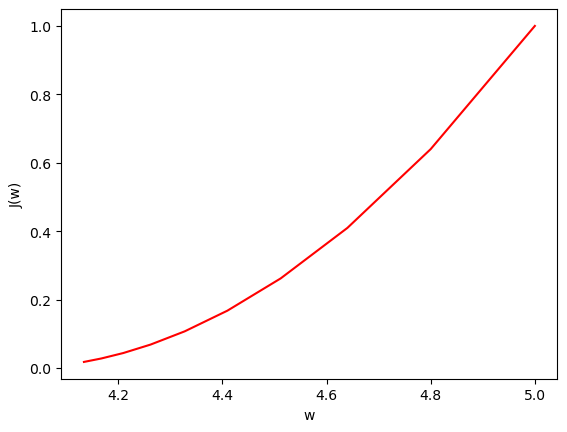

In [69]:
# visualize the results using a plot
import matplotlib.pyplot as plt
plt.plot(w_vals, costJ_vals, 'r-')
plt.xlabel('w')
plt.ylabel('J(w)')
plt.show()